In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
def read_data(input_file_path,output_folder):
    
    '''
    This function reads the input file, and gets data for each of the module.
    inputs: input_file_path = path to the input data file 
            output_folder = path to the folder where module data is to be saved 
    output: data_extracted = a dictionary of extracted data
    '''
    
    
    
    file=open(input_file_path,'r')
    data_headers={}
    data_values={}
    data_filter={}
    module_names=[]
    module_check=0

    for line in file:

        if(line[:2]=='##'):
            continue

        elif(line[:2]=='>>'):
            if(module_check==0):
                module_filter=line[-5:].strip()
                module_name=line[2:-5].strip()
                module_names.append(module_name)
                data_headers[module_name]=[]
                data_values[module_name]=[]
                data_filter[module_name]=module_filter
                module_check=1
            elif(module_check==1):
                module_check=0

        elif(line[:1]=='#'):
            data_headers[module_name].append(line)
        else:
            data_values[module_name].append(line)
    
    #write to output folders 
    for mn in module_names:
        list_out=['>>'+mn+'\t'+data_filter[mn]+'\n']
        list_out.extend(data_headers[mn])
        list_out.extend(data_values[mn])
        list_out.append('>>END_Module')
        
        directory=output_folder+'/'+mn
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        
        with open(directory+'/'+mn+'.txt','w') as f:
            for item in list_out:
                f.write(item)
        
    
    
    
    data_extracted={}
    for module_name in module_names:
        print(module_name)

        #getting cols 
        headers=data_headers[module_name]
        columns=[]
        for h in headers:
            cols=[]
            for c in h.split('\t'):
                c=c.replace('#','')
                c=c.replace('\n','')
                cols.append(c)
            columns.append(cols)
    #     print(columns)

        #getting values 
        data=data_values[module_name]
        values=[]
        for d in data:
            v=d.split('\t')
            v[-1]=v[-1].replace('\n','')
            values.append(v)
    #     print(values)


        data_extracted[module_name]=[columns,values]
    return data_extracted

        
            
        

def get_frames(data_extracted):
    '''
    This function creates pandas dataframes from the extracted data. These data frames are later on used for visualizations.
    inputs: data_extracted = a dictionary of extracted data 
    output: data_frames = a dictionary of pandas data frames 
    '''
    data_frames={}
    for module_name in data_extracted:
        print(module_name)
        cs=data_extracted[module_name][0][-1]
        vs=data_extracted[module_name][1]
        df=pd.DataFrame(vs,columns=cs)
        data_frames[module_name]=df
    return data_frames

In [3]:

def plot_graphs(data_frames):
    
    
    #1 Per sequence quality scores
    df=data_frames['Per sequence quality scores']
    df['Quality']=df['Quality'].astype(int)
    df['Count']=df['Count'].astype(float)
    plt.figure(figsize=(20,6))
    plt.plot(df['Quality'],df['Count'])
    plt.title('Per sequence quality scores')
    plt.xticks(df['Quality'])
    plt.xlabel('Quality')
    plt.ylabel('Count')
    plt.savefig(output_folder+'Per sequence quality scores/plot.png')



    #2 Per base sequence content
    df=data_frames['Per base sequence content']
    df['Base']=df['Base'].astype(int)
    df['G']=df['G'].astype(float)
    df['A']=df['A'].astype(float)
    df['T']=df['T'].astype(float)
    df['C']=df['C'].astype(float)
    plt.figure(figsize=(20,6))
    plt.plot(df['Base'],df['G'],label='G')
    plt.plot(df['Base'],df['A'],label='A')
    plt.plot(df['Base'],df['T'],label='T')
    plt.plot(df['Base'],df['C'],label='C')
    plt.legend()
    plt.xlabel('position in read')
    plt.title('Sequence content across all bases')
    plt.savefig(output_folder+'Per base sequence content/plot.png')
    
    #3 Per sequence GC content
    df=data_frames['Per sequence GC content']
    df['GC Content']=df['GC Content'].astype(int)
    df['Count']=df['Count'].astype(float)
    plt.figure(figsize=(20,6))
    plt.plot(df['GC Content'],df['Count'])
    plt.xlabel('GC Content')
    plt.title('GC distribution over all sequences')
    plt.savefig(output_folder+'Per sequence GC content/plot.png')
    
    
    #4 Per base N content 
    df=data_frames['Per base N content']
    df['Base']=df['Base'].astype(int)
    df['N-Count']=df['N-Count'].astype(float)
    plt.figure(figsize=(20,6))
    plt.plot(df['Base'],df['N-Count'])
    plt.xlabel('position in read')
    plt.title('N-Content across all bases')
    plt.savefig(output_folder+'Per base N content/plot.png')
    
    
    #5 Sequence Duplication Levels 
    df=data_frames['Sequence Duplication Levels']
    df['Percentage of deduplicated']=df['Percentage of deduplicated'].astype(float)
    df['Percentage of total']=df['Percentage of total'].astype(float)
    plt.figure(figsize=(20,6))
    plt.plot(df['Duplication Level'],df['Percentage of deduplicated'],label='Duplicated sequences')
    plt.plot(df['Duplication Level'],df['Percentage of total'],label='Total sequences')
    plt.legend()
    plt.xlabel('Sequence Duplication level')
    plt.title('percentage of sequences remaining')
    plt.savefig(output_folder+'Sequence Duplication Levels/plot.png')
    
    
    #6 Adapter Content
    df=data_frames['Adapter Content']
    df['Position']=df['Position'].astype(int)
    df['Illumina Universal Adapter']=df['Illumina Universal Adapter'].astype(float)
    df['Illumina Small RNA Adapter']=df['Illumina Small RNA Adapter'].astype(float)
    df['Nextera Transposase Sequence']=df['Nextera Transposase Sequence'].astype(float)
    df['SOLID Small RNA Adapter']=df['SOLID Small RNA Adapter'].astype(float)
    plt.figure(figsize=(20,6))
    plt.plot(df['Position'],df['Illumina Universal Adapter'],label='Illumina Universal Adapter')
    plt.plot(df['Position'],df['Illumina Small RNA Adapter'],label='Illumina Small RNA Adapter')
    plt.plot(df['Position'],df['Nextera Transposase Sequence'],label='Nextera Transposase Sequence')
    plt.plot(df['Position'],df['SOLID Small RNA Adapter'],label='SOLID Small RNA Adapter')
    plt.legend()
    plt.xlabel('Position in read')
    plt.title('adapter')
    plt.savefig(output_folder+'Adapter Content/plot.png')
    


Basic Statistics
Per base sequence quality
Per tile sequence quality
Per sequence quality scores
Per base sequence content
Per sequence GC content
Per base N content
Sequence Length Distribution
Sequence Duplication Levels
Overrepresented sequences
Adapter Content
Kmer Content
Basic Statistics
Per base sequence quality
Per tile sequence quality
Per sequence quality scores
Per base sequence content
Per sequence GC content
Per base N content
Sequence Length Distribution
Sequence Duplication Levels
Overrepresented sequences
Adapter Content
Kmer Content


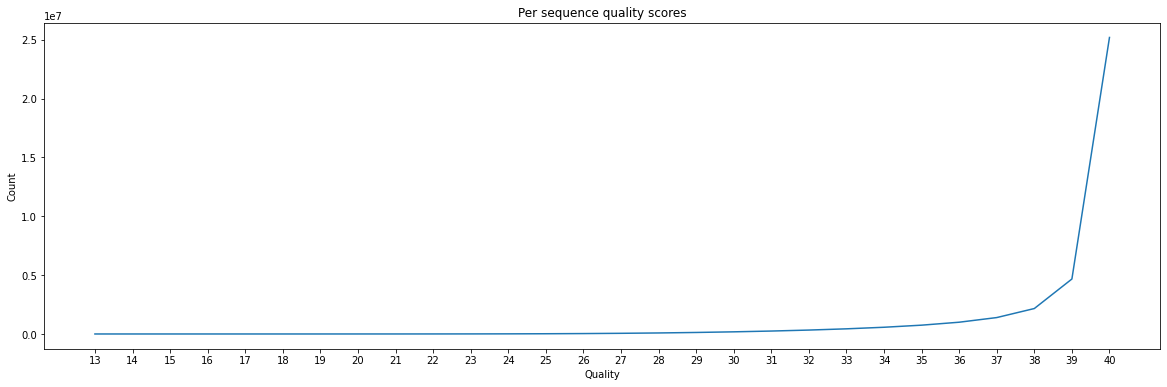

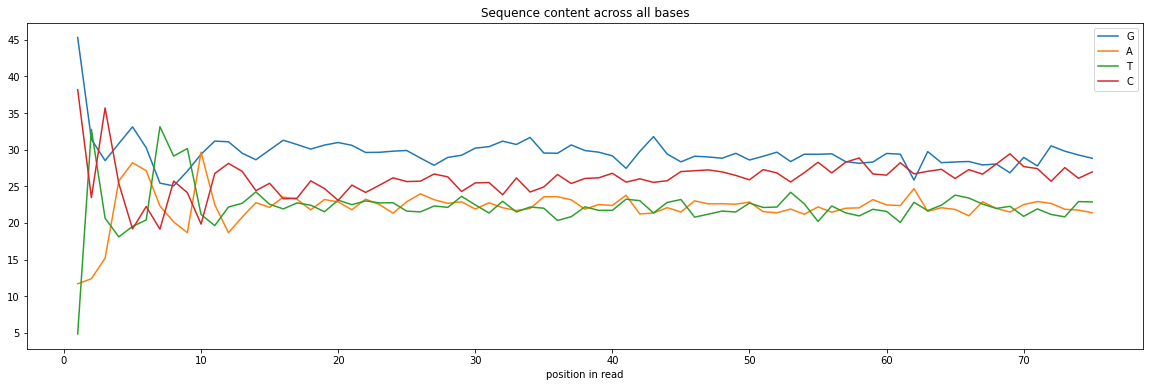

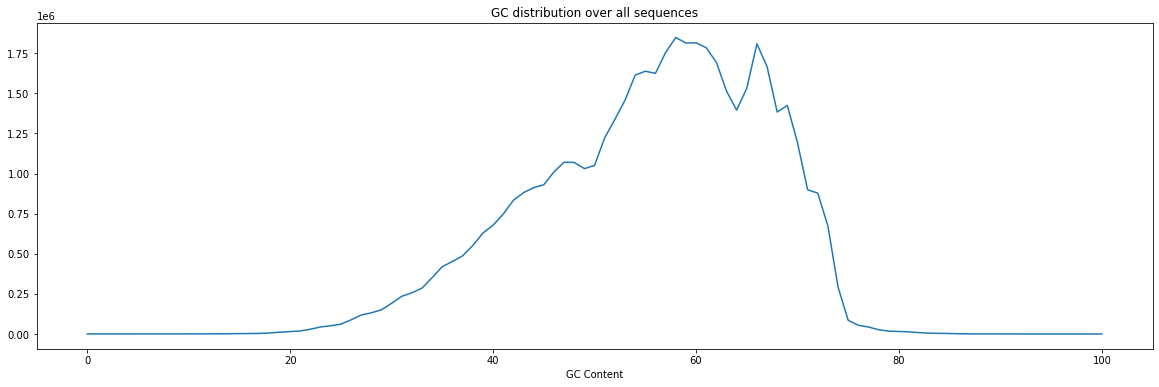

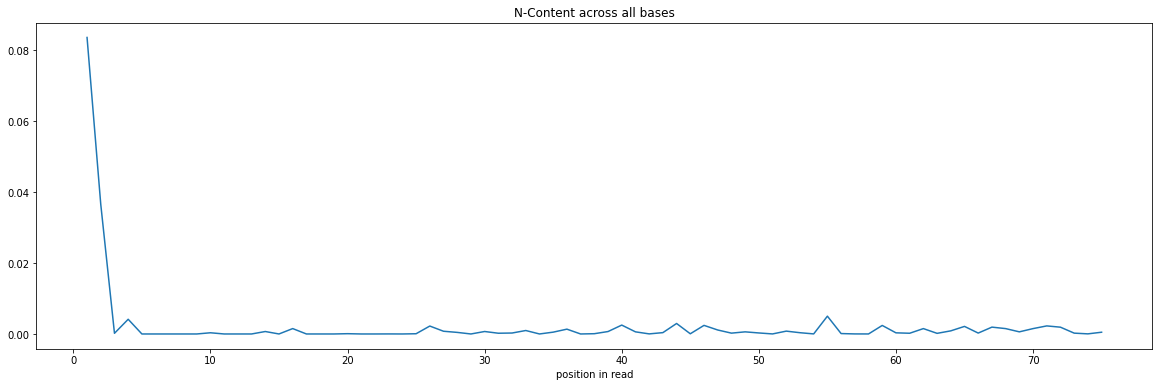

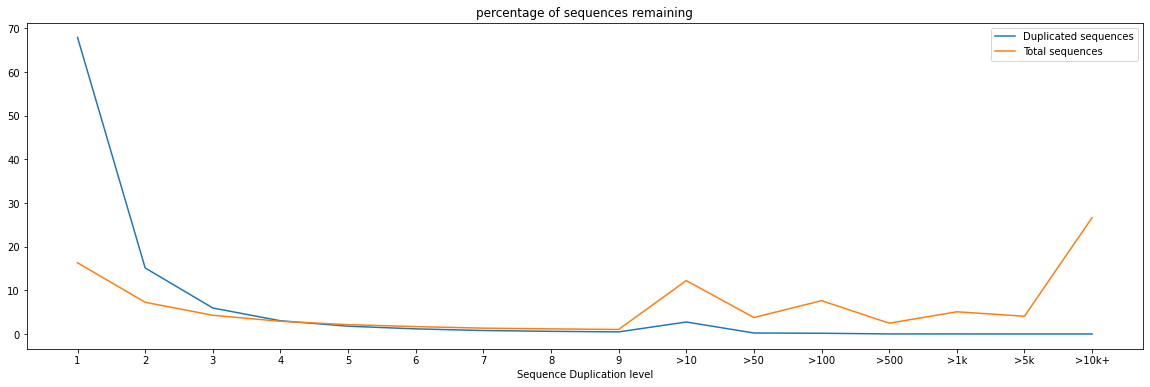

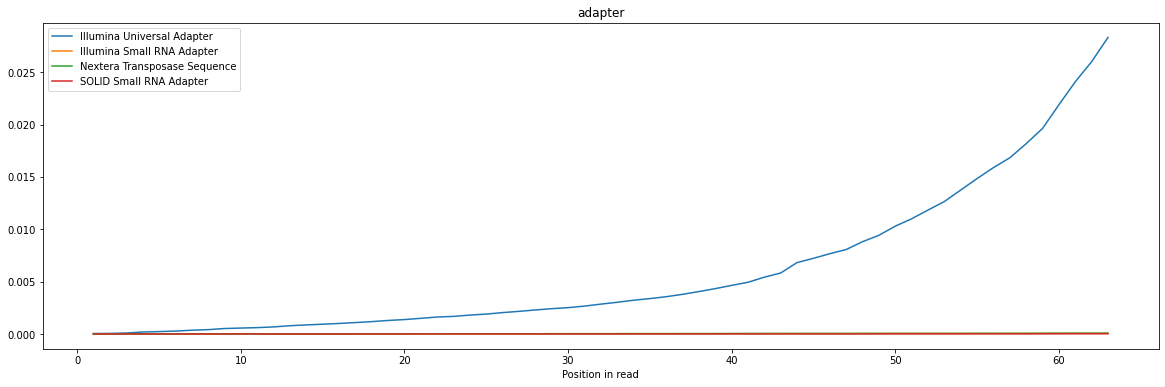

In [4]:
file_path='Test_Data/fastqc_data1.txt'
output_folder='output/'
data_extracted=read_data(file_path,output_folder)
data_frames=get_frames(data_extracted)
plot_graphs(data_frames)